In [ ]:
import joblib
import shap
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving engine_data.csv to engine_data.csv


In [ ]:
uploaded=files.upload()

Saving scaler.pkl to scaler.pkl


In [ ]:
uploaded=files.upload()

Saving one_class_svm.pkl to one_class_svm.pkl


In [ ]:
df = pd.read_csv("engine_data.csv")
model = joblib.load("one_class_svm.pkl")
scaler = joblib.load("scaler.pkl")

In [ ]:
features = ["Engine rpm", "Lub oil pressure", "Fuel pressure", "Coolant pressure", "lub oil temp", "Coolant temp"]
X_scaled = scaler.transform(df[features])

In [ ]:
background = shap.sample(X_scaled, 100)  # Reduce to 100 samples for efficiency
explainer = shap.KernelExplainer(model.decision_function, background)
shap_values = explainer.shap_values(X_scaled[:500])

  0%|          | 0/500 [00:00<?, ?it/s]

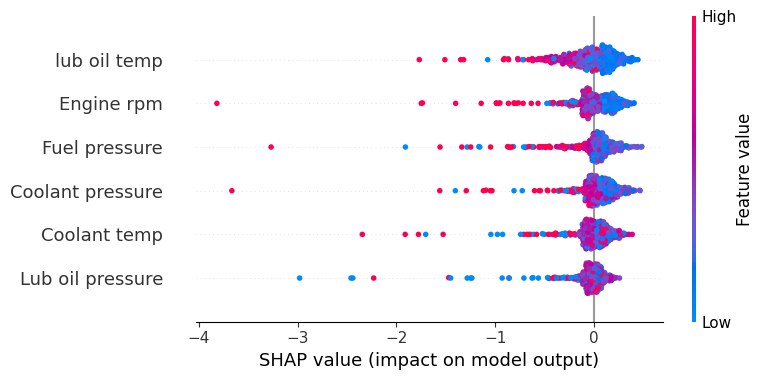

In [ ]:
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values, X_scaled[:500], feature_names=features, show=False)
plt.savefig("/content/shap_summary_plot.png")
plt.show()

In [ ]:
import numpy as np

In [ ]:
print("\n Feature Importance (Higher = More Impact on Anomaly Detection):\n")
for feature, importance in zip(features, np.abs(shap_values).mean(axis=0)):
    print(f"{feature}: {importance:.4f}")


 Feature Importance (Higher = More Impact on Anomaly Detection):

Engine rpm: 0.1634
Lub oil pressure: 0.1206
Fuel pressure: 0.1569
Coolant pressure: 0.1466
lub oil temp: 0.1888
Coolant temp: 0.1311


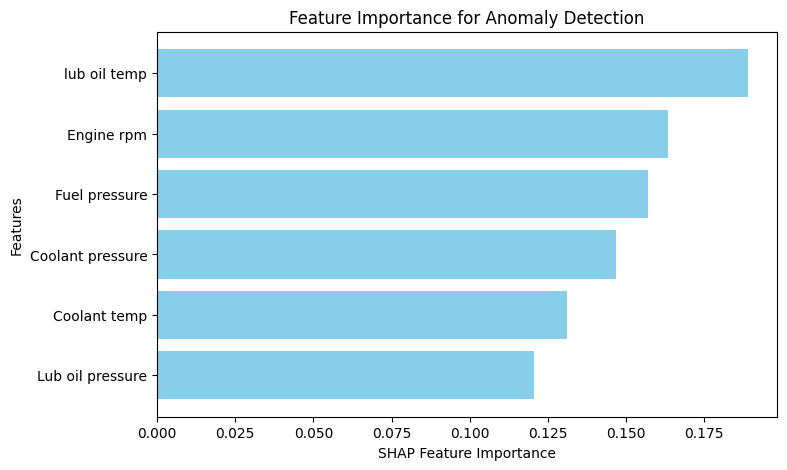

In [26]:
sorted_idx = np.argsort(np.abs(shap_values).mean(axis=0))[::-1]
features_sorted = [features[i] for i in sorted_idx]
importance_sorted = [np.abs(shap_values).mean(axis=0)[i] for i in sorted_idx]

plt.figure(figsize=(8, 5))
plt.barh(features_sorted, importance_sorted, color='skyblue')
plt.xlabel("SHAP Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Anomaly Detection")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
print("✅ SHAP Analysis Completed!")

✅ SHAP Analysis Completed!
